# MA3701 Aerodynamics
## Homework assignment

### Question 1a)

Steady level flight implies that lift = weight.

$Lift = \frac{1}{2}\rho v^2 s C_{L}$

, we can express $C_{L}$ as a function of velocity.

Using manual calculation, it is found that velocity = 13.6 and thus, the range of velocity chosen is from 14 to 40.

#### Steps to plot the v against cl curve
1) Vary the velocity from 14 to 40 in steps of 1

2) Calculate the cl for every velocity

3) Plot the graph

Text(0.5, 1.0, 'V against Cl curve')

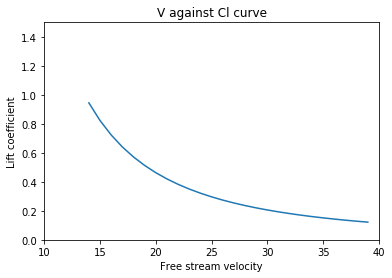

In [236]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Defining the variables
w = 10  #Weight
b = 0.6 #span
pa = 15 #Power available
taper = 0.5 #Taper ratio
Cr = 0.2 #Chord at root
alphazero = math.radians(-1) #Angle at which lift is zero (Degrees)
a = 2*(math.pi) #the 2D slope 
AR = 4 #The AR of the plane

v = np.arange(14,40,1) #lets v take a range from 14 to 40 in steps of 1
cl = (20/((1.2)*(0.09)))*(1/v**2) # Calculate cl, using L = 0.5(rho)(v^2)(S)(cl)
plt.plot(v, cl) #Plot the curve of v against cl
plt.axis([10,40,0,1.5])
plt.ylabel('Lift coefficient')
plt.xlabel('Free stream velocity')
plt.title("V against Cl curve")

### Question 1b)
Using the previous part's answer, we are able to find A1 using Cl as they are related through the equation, 

$Cl = A1*\pi*AR$

Given 3 different thetta, there will be A1, A3 and A5 for each different thetta.

Coefficient of An = $(n/sin\theta + 4b/a_{0}c)sin(n\theta)$

Thereby forming the matrix as shown below:

$$
\begin{bmatrix} a1 & a2 & a3 \\ b1 & b2 & b3 \\ c1 & c2 & c3 \end{bmatrix} 
\begin{bmatrix} A1\\ A3 \\ A5\end{bmatrix} = 
\begin{bmatrix}  \alpha - a_{0} \\ \alpha - a_{0} \\ \alpha - a_{0} \end{bmatrix}$$

Given that there is also no geometric twist in the wing, this means that the angle of attack at different $\theta$ is constant. We then use the inverse of the 3X3 matrix and multiply it to the front of each equation, forming the matrix shown below:

$$
\begin{bmatrix} A1\\ A3\\ A5\end{bmatrix} =
\begin{bmatrix} a1 & a2 & a3\\ b1 & b2 & b3\\ c1 & c2 & c3\end{bmatrix}^{-1}
\begin{bmatrix}  \alpha - a_{0} \\ \alpha - a_{0} \\ \alpha - a_{0} \end{bmatrix}$$

Now, it is obvious that if we multiply the first row of the inverse matrix with $\alpha-a_{0}$. 
Assuming the inverse matrix to be = $$\begin{bmatrix} d1 & d2 & d3\\ e1 & e2 & e3\\ f1 & f2 & f3\end{bmatrix}$$
we will get 1 equation with 2 unknown, as shown:

$$
\begin{bmatrix} d1 & d2 & d3\end{bmatrix}
\begin{bmatrix}  \alpha - a_{0} \\ \alpha - a_{0} \\ \alpha - a_{0} \end{bmatrix}
=
\begin{bmatrix} A1\end{bmatrix}$$

we can then equate the A1, calculated from the Cl from the previous part to find the angle of attack at different velocity. We can then plot the angle of attack and the corresponding velocity, giving us the geometric angle of attack need to fly the vehicle.

Text(0.5, 1.0, 'V against AOA curve')

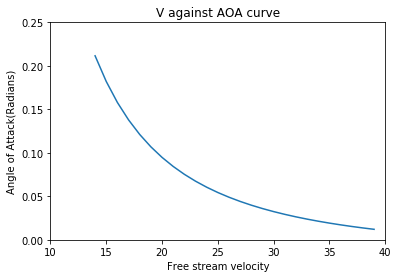

In [243]:
#Calculate the coefficient of An
def coeff(thetta,n):
    return (((n/math.sin(thetta))+((4/(2*math.pi)*(((1+taper)*AR)/(2*(1+(taper-1)*math.cos(thetta)))))))*math.sin(n*thetta)) 
#Creating the matrix
matrix = [[coeff(math.radians(22.5),1),coeff(math.radians(22.5),3),coeff(math.radians(22.5),5)],
          [coeff(math.radians(45),1),coeff(math.radians(45),3),coeff(math.radians(45),5)],
          [coeff(math.radians(67.5),1),coeff(math.radians(67.5),3),coeff(math.radians(67.5),5)]]
#Finding the inverse of the matrix
invmatrix = np.linalg.inv(matrix)
A1 = cl/(math.pi*AR)
aoa =A1/(sum(invmatrix[0]))+math.radians(-1)
plt.plot(v,aoa)
plt.axis([10,40,0,0.25])
plt.xlabel('Free stream velocity')
plt.ylabel('Angle of Attack(Radians)')
plt.title('V against AOA curve')

### Question 1c)
Given that Induced drag is a function of cl, A1, A3 and A5. we have to use the previous parts to solve the problem. The relation is shown below

$C_{d,i} = \frac{C_{L}^2}{\pi AR}(1+3(\frac{A3}{A1}^2)+5(\frac{A5}{A1}^2))$

To find $C_{d,i}$, we have to find A3 and A5 which could be easily found given the angle of attack.

$A3 =
\begin{bmatrix} e1 & e2 & e3\end{bmatrix}
\begin{bmatrix}  \alpha - a_{0} \\ \alpha - a_{0} \\ \alpha - a_{0} \end{bmatrix}$

$A5 = 
\begin{bmatrix} f1 & f2 & f3\end{bmatrix}
\begin{bmatrix}  \alpha - a_{0} \\ \alpha - a_{0} \\ \alpha - a_{0} \end{bmatrix}$

Finally, we can calculate the induced drag coefficient and plot the curve of $C_{d,i}$ against v

Text(0.5, 1.0, 'V against Cdi curve')

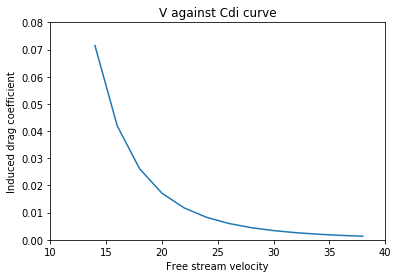

In [246]:
A3 = sum(invmatrix[1])*(aoa-math.radians(-1)) #Calculating A3
A5 = sum(invmatrix[2])*(aoa-math.radians(-1)) #Calculating A5
cdi = (cl**2/(math.pi*AR))*(1+(3*(A3/A1)**2)+(5*(A5/A1)**2)) #Calculating the induced drag coefficient
plt.plot(v,cdi)
plt.xlabel("Free stream velocity")
plt.ylabel("Induced drag coefficient")
plt.axis([10,40,0,0.08])
plt.title("V against Cdi curve")

### Question 1d)
It is given that $C_{D} = 0.005 + C_{d,i}$ 

$Drag = \frac{1}{2} \rho v^2 s C_{D}$ 

We simply calculate the drag coefficient and then, the drag and plot the velocity against drag.

Text(0.5, 1.0, 'V against D curve')

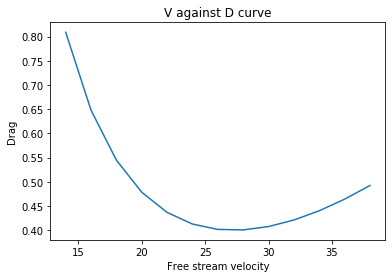

In [248]:
cd = 0.005+cdi
drag = 0.5*(1.2)*(v**2)*(0.09)*cd
plt.plot(v,drag)
plt.xlabel("Free stream velocity")
plt.ylabel("Drag")
plt.title("V against D curve")

### Question 1e)

It is given that the point of minimum drag is the optimum flying condition for the vehicle. We then proceed to find the velocity that corresponds to the lowest drag. 

We then proceed on to use the flight velocity to obtain the angle of attack at the condition.

In [266]:
#part e
drag_lst = []
dicts={}
for v in range(14,40,1):
    cl = (20/((1.2)*(0.09)))*(1/v**2)
    A1 = cl/(math.pi*AR)
    aoa =A1/(sum(invmatrix[0]))+math.radians(-1)
    A3 = sum(invmatrix[1])*(aoa-math.radians(-1))
    A5 = sum(invmatrix[2])*(aoa-math.radians(-1))
    cdi = (cl**2/(math.pi*AR))*(1+(3*(A3/A1)**2)+(5*(A5/A1)**2))
    cd = 0.005+cdi
    drag = 0.5*(1.2)*(v**2)*(0.09)*cd
    dicts[drag]=v
    drag_lst.append(drag)
vdmin=dicts[min(drag_lst)]
print("The flight velocity at the given condition is {:g}m/s".format(float('{:.3g}'.format(vdmin))))
cldmin = (20/((1.2)*(0.09)))*(1/vdmin**2)
aoadmin = cldmin/(2*math.pi) + math.radians(-1)
print("The angle of trim at the given condition is {:g} radians".format(float('{:.4g}'.format(aoadmin))))

The flight velocity at the given condition is 27m/s
The angle of trim at the given condition is 0.02298 radians


### Question 1f)
$Power available = Thrust Available * Velocity$

Using this equation, we are able to find the thrust available at the optimum flying speed.

$Power required = Drag * Velocity$

Therefore, we can find the power required by the plane at the optimum flying speed and comparing with the given power availble, we can determine if the vehicle will fly

In [267]:
pa = 15 #power available
ta = 15/vdmin #Calculate trust availble
print("The thrust available is {:g}N".format(float('{:.4g}'.format(ta))))
pr = min(drag_lst)*dicts[min(drag_lst)] #Calculate power required
print("The Power required is {:g}W and therefore, the plane will fly".format(float('{:.4g}'.format(pr))))

The thrust available is 0.5556N
The Power required is 10.8W and therefore, the plane will fly
